## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0   1.233977   929.419618  0.765298  6.118289   711.457756
1  89.919321   605.305253  0.490871  4.367348   310.392336
2  12.518831  1545.051921  0.450145  5.122931   695.397723
3  98.913844   509.004016  0.175535  7.089242   133.424207
4  98.163857  1500.354164  0.737500  3.712733  1110.862829


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9997876	total: 58ms	remaining: 57.9s
1:	learn: 0.9889674	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9763330	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9650266	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9526829	total: 60.1ms	remaining: 12s
5:	learn: 0.9422521	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9275397	total: 61.1ms	remaining: 8.66s
7:	learn: 0.9131422	total: 61.6ms	remaining: 7.63s
8:	learn: 0.9016578	total: 61.9ms	remaining: 6.82s
9:	learn: 0.8888945	total: 62.4ms	remaining: 6.18s
10:	learn: 0.8779719	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8651477	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8527883	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8411304	total: 64.1ms	remaining: 4.52s
14:	learn: 0.8298578	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8188668	total: 65.1ms	remaining: 4.01s
16:	learn: 0.8080246	total: 65.6ms	remaining: 3.79s
17:	learn: 0.7981588	total: 66ms	remaining: 3.6s
18:	learn: 0.7895257	total: 66.4ms	remaining: 3.43s

96:	learn: 0.3163709	total: 101ms	remaining: 937ms
97:	learn: 0.3125517	total: 101ms	remaining: 932ms
98:	learn: 0.3107037	total: 102ms	remaining: 927ms
99:	learn: 0.3064014	total: 102ms	remaining: 920ms
100:	learn: 0.3025779	total: 103ms	remaining: 913ms
101:	learn: 0.2993963	total: 103ms	remaining: 906ms
102:	learn: 0.2964554	total: 103ms	remaining: 899ms
103:	learn: 0.2930403	total: 104ms	remaining: 893ms
104:	learn: 0.2900436	total: 104ms	remaining: 887ms
105:	learn: 0.2870567	total: 104ms	remaining: 881ms
106:	learn: 0.2835123	total: 105ms	remaining: 875ms
107:	learn: 0.2806515	total: 105ms	remaining: 869ms
108:	learn: 0.2774965	total: 106ms	remaining: 863ms
109:	learn: 0.2753614	total: 106ms	remaining: 856ms
110:	learn: 0.2720507	total: 106ms	remaining: 851ms
111:	learn: 0.2704028	total: 107ms	remaining: 845ms
112:	learn: 0.2682736	total: 107ms	remaining: 840ms
113:	learn: 0.2661402	total: 107ms	remaining: 835ms
114:	learn: 0.2633112	total: 108ms	remaining: 829ms
115:	learn: 0.26

286:	learn: 0.0735362	total: 184ms	remaining: 457ms
287:	learn: 0.0732460	total: 184ms	remaining: 456ms
288:	learn: 0.0728649	total: 186ms	remaining: 456ms
289:	learn: 0.0725098	total: 186ms	remaining: 455ms
290:	learn: 0.0721758	total: 186ms	remaining: 454ms
291:	learn: 0.0718829	total: 187ms	remaining: 453ms
292:	learn: 0.0714222	total: 187ms	remaining: 452ms
293:	learn: 0.0711303	total: 188ms	remaining: 452ms
294:	learn: 0.0707690	total: 189ms	remaining: 451ms
295:	learn: 0.0704615	total: 189ms	remaining: 450ms
296:	learn: 0.0700929	total: 190ms	remaining: 449ms
297:	learn: 0.0698130	total: 190ms	remaining: 449ms
298:	learn: 0.0695414	total: 191ms	remaining: 448ms
299:	learn: 0.0691593	total: 191ms	remaining: 446ms
300:	learn: 0.0688464	total: 192ms	remaining: 445ms
301:	learn: 0.0684990	total: 192ms	remaining: 444ms
302:	learn: 0.0681990	total: 193ms	remaining: 443ms
303:	learn: 0.0678983	total: 193ms	remaining: 442ms
304:	learn: 0.0675652	total: 194ms	remaining: 441ms
305:	learn: 

481:	learn: 0.0340243	total: 279ms	remaining: 300ms
482:	learn: 0.0339636	total: 280ms	remaining: 300ms
483:	learn: 0.0338099	total: 280ms	remaining: 299ms
484:	learn: 0.0337505	total: 281ms	remaining: 298ms
485:	learn: 0.0336920	total: 282ms	remaining: 298ms
486:	learn: 0.0336413	total: 282ms	remaining: 297ms
487:	learn: 0.0334789	total: 282ms	remaining: 296ms
488:	learn: 0.0333390	total: 283ms	remaining: 296ms
489:	learn: 0.0333003	total: 283ms	remaining: 295ms
490:	learn: 0.0331274	total: 284ms	remaining: 294ms
491:	learn: 0.0330718	total: 284ms	remaining: 294ms
492:	learn: 0.0330170	total: 285ms	remaining: 293ms
493:	learn: 0.0329795	total: 285ms	remaining: 292ms
494:	learn: 0.0328117	total: 286ms	remaining: 292ms
495:	learn: 0.0326803	total: 286ms	remaining: 291ms
496:	learn: 0.0326322	total: 287ms	remaining: 290ms
497:	learn: 0.0324700	total: 287ms	remaining: 290ms
498:	learn: 0.0324230	total: 288ms	remaining: 289ms
499:	learn: 0.0322648	total: 288ms	remaining: 288ms
500:	learn: 

644:	learn: 0.0185652	total: 361ms	remaining: 199ms
645:	learn: 0.0184951	total: 362ms	remaining: 198ms
646:	learn: 0.0184331	total: 362ms	remaining: 198ms
647:	learn: 0.0183612	total: 363ms	remaining: 197ms
648:	learn: 0.0183033	total: 363ms	remaining: 196ms
649:	learn: 0.0182436	total: 364ms	remaining: 196ms
650:	learn: 0.0181737	total: 364ms	remaining: 195ms
651:	learn: 0.0181172	total: 365ms	remaining: 195ms
652:	learn: 0.0180486	total: 365ms	remaining: 194ms
653:	learn: 0.0179916	total: 366ms	remaining: 193ms
654:	learn: 0.0179324	total: 366ms	remaining: 193ms
655:	learn: 0.0178771	total: 367ms	remaining: 192ms
656:	learn: 0.0178114	total: 367ms	remaining: 192ms
657:	learn: 0.0177472	total: 368ms	remaining: 191ms
658:	learn: 0.0176929	total: 368ms	remaining: 190ms
659:	learn: 0.0176395	total: 369ms	remaining: 190ms
660:	learn: 0.0175772	total: 369ms	remaining: 189ms
661:	learn: 0.0175226	total: 370ms	remaining: 189ms
662:	learn: 0.0174694	total: 370ms	remaining: 188ms
663:	learn: 

834:	learn: 0.0095920	total: 457ms	remaining: 90.2ms
835:	learn: 0.0095703	total: 457ms	remaining: 89.7ms
836:	learn: 0.0095519	total: 458ms	remaining: 89.2ms
837:	learn: 0.0095248	total: 459ms	remaining: 88.6ms
838:	learn: 0.0095121	total: 459ms	remaining: 88.1ms
839:	learn: 0.0094973	total: 460ms	remaining: 87.6ms
840:	learn: 0.0094581	total: 461ms	remaining: 87.1ms
841:	learn: 0.0094373	total: 461ms	remaining: 86.6ms
842:	learn: 0.0094006	total: 462ms	remaining: 86ms
843:	learn: 0.0093744	total: 463ms	remaining: 85.5ms
844:	learn: 0.0093384	total: 463ms	remaining: 85ms
845:	learn: 0.0093121	total: 464ms	remaining: 84.4ms
846:	learn: 0.0092769	total: 464ms	remaining: 83.9ms
847:	learn: 0.0092382	total: 465ms	remaining: 83.3ms
848:	learn: 0.0092130	total: 466ms	remaining: 82.8ms
849:	learn: 0.0091991	total: 466ms	remaining: 82.2ms
850:	learn: 0.0091618	total: 466ms	remaining: 81.7ms
851:	learn: 0.0091442	total: 467ms	remaining: 81.1ms
852:	learn: 0.0091325	total: 467ms	remaining: 80.6

980:	learn: 0.0067915	total: 538ms	remaining: 10.4ms
981:	learn: 0.0067755	total: 538ms	remaining: 9.87ms
982:	learn: 0.0067610	total: 539ms	remaining: 9.32ms
983:	learn: 0.0067484	total: 540ms	remaining: 8.77ms
984:	learn: 0.0067343	total: 540ms	remaining: 8.22ms
985:	learn: 0.0067205	total: 541ms	remaining: 7.67ms
986:	learn: 0.0066916	total: 541ms	remaining: 7.13ms
987:	learn: 0.0066782	total: 542ms	remaining: 6.58ms
988:	learn: 0.0066603	total: 542ms	remaining: 6.03ms
989:	learn: 0.0066382	total: 543ms	remaining: 5.48ms
990:	learn: 0.0066301	total: 543ms	remaining: 4.93ms
991:	learn: 0.0066222	total: 544ms	remaining: 4.38ms
992:	learn: 0.0066099	total: 544ms	remaining: 3.84ms
993:	learn: 0.0065746	total: 545ms	remaining: 3.29ms
994:	learn: 0.0065533	total: 545ms	remaining: 2.74ms
995:	learn: 0.0065399	total: 546ms	remaining: 2.19ms
996:	learn: 0.0065274	total: 546ms	remaining: 1.64ms
997:	learn: 0.0065066	total: 547ms	remaining: 1.09ms
998:	learn: 0.0064723	total: 547ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


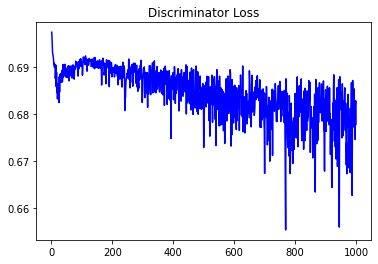

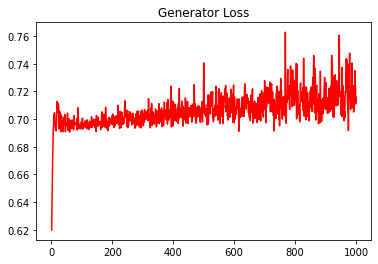

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007596251859847674


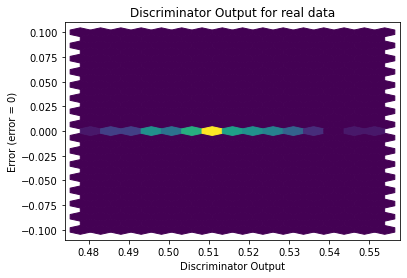

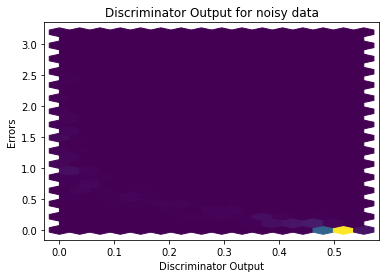

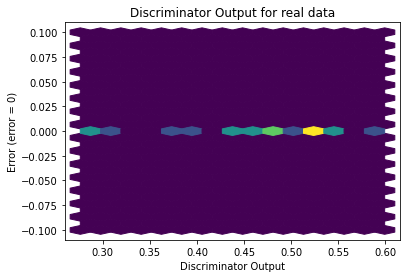

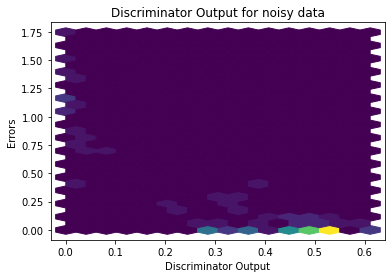

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1282]], requires_grad=True)
